In [16]:
import pandas as pd
import numpy as np 
import pickle
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

data = pd.read_csv("C:/Users/Lenovo/Kesslar.csv")



In [40]:
data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'ASD'],
      dtype='object')

In [17]:

data.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
ASD          0
dtype: int64

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'hue'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


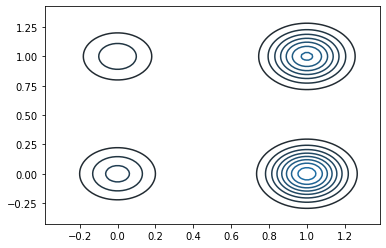

In [21]:
sns.kdeplot(data,hue='ASD')

In [76]:
x = data.drop(columns = ['ASD'])
y = data['ASD']

In [79]:
X= np.array(X)
y = np.array(y)
y = y.reshape(-1,1)
y.shape
x.shape

(704, 10)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
print(X_train.shape); print(X_test.shape)

(563, 10)
(141, 10)


Neural Network

In [56]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,8,5), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train.ravel())

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [116]:
"""Testing Accuracy"""
print(mlp.score(X_test,y_test))

"""Training Accuracy"""
print(mlp.score(X_train,y_train))

0.9929078014184397
1.0


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

In [ ]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

In [111]:
'''Input from the custom User'''


y= [['0','1', '1','0','0','1','0','1','0','1']]
y1= pd.DataFrame(y)
y1.shape
k=mlp.predict(y1)
if(k[0]==0):
    print("No need for counsellor")
else:
    print("Yes you need counsellor ")

No need for counsellor


RANDOM FOREST

In [28]:
X = data.drop(columns = ['ASD'])
y = data['ASD']

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
y = y.reshape(-1,1)
y.shape

(704, 1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
print(X_train.shape); print(X_test.shape)

(563, 10)
(141, 10)


In [34]:
from sklearn.ensemble import RandomForestRegressor
  

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [35]:
accuracy_RandomForest = clf.score(X_test,y_test)
accuracy_RandomForest

0.8910906489524782

In [36]:
prediction = clf.predict(X)
prediction2 =  prediction.reshape(-1,1)
print(prediction2.shape)
# Get Unique_ID and similarity

final_score = pd.DataFrame(prediction2)
final_score.head(3) 
final_score.to_csv('final_score.csv',index=False)

(704, 1)


IMPORTANT FEATURE FOR Stress Recomendation

In [41]:
feature_names = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
print(feature_names)

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']


In [42]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

A9_Score     0.251740
A6_Score     0.187996
A4_Score     0.105690
A5_Score     0.094875
A7_Score     0.082918
A1_Score     0.070243
A8_Score     0.061329
A3_Score     0.055520
A2_Score     0.047603
A10_Score    0.042087
dtype: float64

No handles with labels found to put in legend.


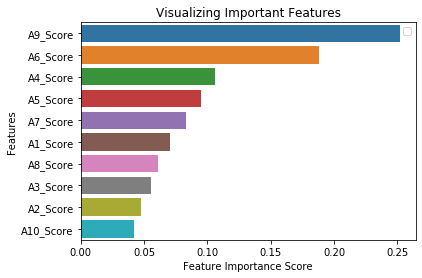

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [113]:
'''Input from the custom User'''


y= [['0','1', '1','0','0','1','0','1','0','1']]
y1= pd.DataFrame(y)
y1.shape
k=clf.predict(y1)
if(k[0]==0):
    print("No need for counsellor")
else:
    print("Yes you need counsellor ")

Yes you need counsellor 
